In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime

In [112]:
sites = ["Grouse Camp", "Pope Ridge", "Sentinel Butte", "Three Creeks Meadow", "Harts Pass"]

site = sites[4]

fire_dates = {
    'Pope Ridge': "2014-07-16",
    'Three Creeks Meadow': "2012-09-09",
    'Sentinel Butte': "2015-08-11",
    'Grouse Camp': "2012-09-08",
    'Harts Pass': "2003-08-05"
}

print(site)

Harts Pass


In [113]:
df = pd.read_csv(f"data/fire_sites/{site}_swe_meltdates.csv")
df['DOY'] = df['last_snow'].apply(lambda d: int(datetime.strptime(d, "%Y-%m-%d").strftime("%j")))
df['DOWY'] = df['DOY'] + 92    # from oct-1 to dec-31 + DOY
df['date'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-{row['DOY']}", "%Y-%j") ,axis=1)
df.head()

,water_year,last_snow,DOY,DOWY,date
0,1983,1900-06-30,181,273,1983-06-30
1,1984,1900-07-06,187,279,1984-07-05
2,1985,1900-06-11,162,254,1985-06-11
3,1986,1900-06-14,165,257,1986-06-14
4,1987,1900-06-06,157,249,1987-06-06


In [134]:
pre_fire = df[df['date']<fire_dates[site]]  
post_fire = df[df['date']>=fire_dates[site]].iloc[:5]   # For now take all the data. In future maybe it'd be a good idea to limit the number of years we're looking at

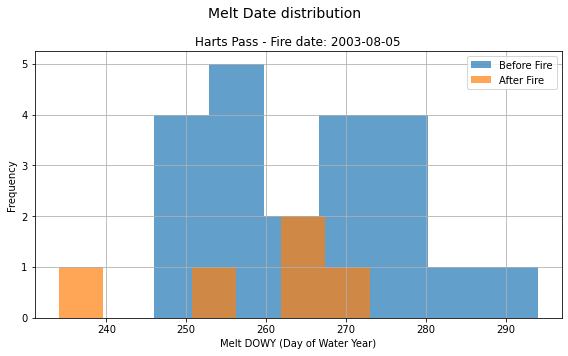

In [135]:
# Distribution of melt dates
fig, ax = plt.subplots(figsize=(8, 5))

# df = dfs[site]
pre_fire['DOWY'].hist(bins=7, ax=ax, label=f'Before Fire', alpha=0.7)
post_fire['DOWY'].hist(bins=7, ax=ax, label=f'After Fire', alpha=0.7)
ax.set_title(f"{site} - Fire date: {fire_dates[site]}")
ax.legend()

ax.set_xlabel("Melt DOWY (Day of Water Year)")
ax.set_ylabel("Frequency")

# xfmt = mpl.dates.DateFormatter('%b')
# months = mpl.dates.MonthLocator()
# weeks = mpl.dates.DayLocator(interval=7)
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(xfmt)
    
fig.suptitle("Melt Date distribution", fontsize=14)
plt.tight_layout()

# fig.savefig(f"ANOVA/{site}_distribution.png")

In [136]:
stats.f_oneway(pre_fire['DOWY'], post_fire['DOWY'])

F_onewayResult(statistic=1.144898811662315, pvalue=0.2952631565370968)

In [133]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['treatments'] = df.apply(lambda row: int(row['date']>=datetime.strptime(fire_dates[site], "%Y-%m-%d"))+1, axis=1)
df_formatted = df.reset_index()[['index', 'DOWY', 'treatments']].rename({'DOWY': 'value'}, axis=1)

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_formatted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# display the results table
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),2.822955,1.0,0.015328,0.902139
Residual,6814.253968,37.0,NaN,NaN


In [105]:
anova_table.to_csv(f"ANOVA/{site}_anova.txt", sep='\t')

# Now let's look at the paired locations

In [213]:
pairs = {
    'Pope Ridge': 'Trinity',
    'Harts Pass': 'Rainy Pass',
    'Grouse Camp': 'Trough',
    'Sentinel Butte': 'Gold Axe Camp',
    'Three Creeks Meadow': 'Irish Taylor'
}
sites = ["Grouse Camp", "Pope Ridge", "Sentinel Butte", "Three Creeks Meadow", "Harts Pass"]

# Change the index to necessary site name
site = sites[4]

fire_dates = {
    'Pope Ridge': "2014-07-16",
    'Three Creeks Meadow': "2012-09-09",
    'Sentinel Butte': "2015-08-11",
    'Grouse Camp': "2012-09-08",
    'Harts Pass': "2003-08-05"
}
paired_site = pairs[site]

print(site, paired_site, sep=', ')

Harts Pass, Rainy Pass


In [214]:
df = pd.read_csv(f"data/fire_sites/{site}_swe_meltdates.csv")
df['DOY'] = df['last_snow'].apply(lambda d: int(datetime.strptime(d, "%Y-%m-%d").strftime("%j")))
df['DOWY'] = df['DOY'] + 92    # from oct-1 to dec-31 + DOY
df['date'] = df.apply(lambda row: datetime.strptime(f"{row['water_year']}-{row['DOY']}", "%Y-%j") ,axis=1)
df.head()

,water_year,last_snow,DOY,DOWY,date
0,1983,1900-06-30,181,273,1983-06-30
1,1984,1900-07-06,187,279,1984-07-05
2,1985,1900-06-11,162,254,1985-06-11
3,1986,1900-06-14,165,257,1986-06-14
4,1987,1900-06-06,157,249,1987-06-06


In [215]:
paired_df = pd.read_csv(f"data/fire_sites/paired_locs/{paired_site}_swe_meltdates.csv")
paired_df['DOY'] = paired_df['last_snow'].apply(lambda d: int(datetime.strptime(d, "%Y-%m-%d").strftime("%j")))
paired_df['DOWY'] = paired_df['DOY'] + 92    # from oct-1 to dec-31 + DOY
paired_df['date'] = paired_df.apply(lambda row: datetime.strptime(f"{row['water_year']}-{row['DOY']}", "%Y-%j") ,axis=1)
paired_df.head()

,water_year,last_snow,DOY,DOWY,date
0,1983,1900-06-27,178,270,1983-06-27
1,1984,1900-07-01,182,274,1984-06-30
2,1985,1900-06-18,169,261,1985-06-18
3,1986,1900-06-14,165,257,1986-06-14
4,1987,1900-06-13,164,256,1987-06-13


In [222]:
pre_fire = df[df['date']<fire_dates[site]]  
post_fire = df[df['date']>=fire_dates[site]]   # For now take all the data. In future maybe it'd be a good idea to limit the number of years we're looking at

pre_fire_pair = paired_df[paired_df['date']<fire_dates[site]]
post_fire_pair = paired_df[paired_df['date']>=fire_dates[site]].iloc[:10]

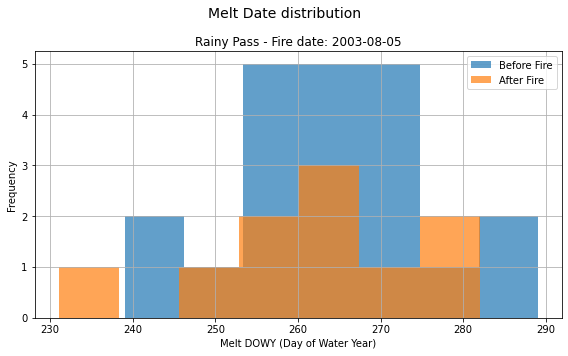

In [223]:
# Distribution of melt dates
fig, ax = plt.subplots(figsize=(8, 5))

# df = dfs[site]
pre_fire_pair['DOWY'].hist(bins=7, ax=ax, label=f'Before Fire', alpha=0.7)
post_fire_pair['DOWY'].hist(bins=7, ax=ax, label=f'After Fire', alpha=0.7)
ax.set_title(f"{paired_site} - Fire date: {fire_dates[site]}")
ax.legend()

ax.set_xlabel("Melt DOWY (Day of Water Year)")
ax.set_ylabel("Frequency")

# xfmt = mpl.dates.DateFormatter('%b')
# months = mpl.dates.MonthLocator()
# weeks = mpl.dates.DayLocator(interval=7)
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(xfmt)
    
fig.suptitle("Melt Date distribution", fontsize=14)
plt.tight_layout()

# fig.savefig(f"ANOVA/{paired_site}_distribution.png")

In [224]:
stats.f_oneway(pre_fire_pair['DOWY'], post_fire_pair['DOWY'])

F_onewayResult(statistic=0.15429188976159758, pvalue=0.6973396999391777)

In [173]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['treatments'] = df.apply(lambda row: int(row['date']>=datetime.strptime(fire_dates[site], "%Y-%m-%d"))+1, axis=1)
df_formatted = df.reset_index()[['index', 'DOWY', 'treatments']].rename({'DOWY': 'value'}, axis=1)

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_formatted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# display the results table
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),361.0,1.0,3.254085,0.090105
Residual,1775.0,16.0,NaN,NaN


In [105]:
anova_table.to_csv(f"ANOVA/{site}_anova.txt", sep='\t')